# r book
#### Cole Hamilton
#### @Cbhami test

# Load the required packages


In [397]:
#install.packages("tidyverse")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)

# Load the data and clean it up

In [398]:
library(readr)
df <- read_csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv")
cat("This data has", nrow(df), "rows and", ncol(df), "columns.")


Rows: 795 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): Date Submitted, Workout Date, Activity Type, Notes, Source, Link
dbl (9): Calories Burned (kCal), Distance (mi), Workout Time (seconds), Avg ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


This data has 795 rows and 15 columns.

In [399]:
nrow(df)
# count of rows

[1] 795

In [400]:
head(df, 1)
# first row

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
"March 22, 2023","March 22, 2023",Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.305,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327


In [401]:
#write.csv(df, "user94403143_workout_history_clean.csv")

In [402]:
summary(df)
# summary of data

 Date Submitted     Workout Date       Activity Type     
 Length:795         Length:795         Length:795        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories Burned (kCal) Distance (mi)    Workout Time (seconds)
 Min.   :   9           Min.   : 0.000   Min.   :   95         
 1st Qu.: 261           1st Qu.: 2.180   1st Qu.: 1526         
 Median : 404           Median : 3.100   Median : 1806         
 Mean   : 416           Mean   : 3.276   Mean   : 2144         
 3rd Qu.: 461           3rd Qu.: 3.657   3rd Qu.: 2467         
 Max.   :1928           Max.   :13.482   Max.   :11065         
                                                               
 Avg Pace (min/mi) Max P

In [403]:
#df <- data.frame(df)
# convert to data frame

In [404]:
df['Duration'] <- df['Workout Time (seconds)'] / 60
# convert duration to minutes

In [405]:
#determine your working library
getwd()

[1] "/Users/cole/Library/CloudStorage/GoogleDrive-cole.b.hamilton@gmail.com/My Drive/Coraline/MapMyRunProjects"

In [406]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
#df <- data.frame(df)

In [407]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [408]:
head(df)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
"March 22, 2023","March 22, 2023",Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.3050,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667
"March 17, 2023","March 16, 2023",Run,323,3.10542,1869,10.0278,0.745014,5.98334,80.5354,153,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15000
"March 14, 2023","March 14, 2023",Run,559,4.66059,3453,12.3425,1.635220,4.86126,36.6923,130,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55000
"March 13, 2023","March 13, 2023",Run,618,5.02199,3029,10.0499,0.979631,5.97022,61.2475,158,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48333
"March 11, 2023","March 11, 2023",Run,422,3.10000,1887,10.1452,0.000000,5.91415,0.0000,NA,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45000
"March 10, 2023","March 10, 2023",Run,600,4.71032,3236,11.4450,1.114100,5.24247,53.8553,145,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93333


In [409]:
#trim the spaces in the column names
colnames(df) <- gsub(" $", "", colnames(df))
#colnames(df) <- gsub(" ", "", colnames(df))

In [410]:
head(df)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
"March 22, 2023","March 22, 2023",Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.3050,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667
"March 17, 2023","March 16, 2023",Run,323,3.10542,1869,10.0278,0.745014,5.98334,80.5354,153,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15000
"March 14, 2023","March 14, 2023",Run,559,4.66059,3453,12.3425,1.635220,4.86126,36.6923,130,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55000
"March 13, 2023","March 13, 2023",Run,618,5.02199,3029,10.0499,0.979631,5.97022,61.2475,158,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48333
"March 11, 2023","March 11, 2023",Run,422,3.10000,1887,10.1452,0.000000,5.91415,0.0000,NA,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45000
"March 10, 2023","March 10, 2023",Run,600,4.71032,3236,11.4450,1.114100,5.24247,53.8553,145,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93333


In [411]:
#print my column headers
colnames(df)

[1] "Date Submitted"         "Workout Date"           "Activity Type"         
 [4] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [7] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
[10] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[13] "Notes"                  "Source"                 "Link"                  
[16] "Duration"

In [412]:
# # # Convert date/time column to date format
# # df$date_col <- ymd(df$Date.Submitted)
# # print(df$date_col, format = "%Y-%m-%d")
# df$'Date Submitted' <- as.Date(df$Date.Submitted, format = "%B %d, %Y")
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %d, %Y")
require(lubridate)
df$'Date Submitted' <- mdy(df$'Date Submitted')
df$'Workout Date' <- mdy(df$'Workout Date')


In [413]:
head(df)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
2023-03-22,2023-03-22,Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.3050,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667
2023-03-17,2023-03-16,Run,323,3.10542,1869,10.0278,0.745014,5.98334,80.5354,153,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15000
2023-03-14,2023-03-14,Run,559,4.66059,3453,12.3425,1.635220,4.86126,36.6923,130,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55000
2023-03-13,2023-03-13,Run,618,5.02199,3029,10.0499,0.979631,5.97022,61.2475,158,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48333
2023-03-11,2023-03-11,Run,422,3.10000,1887,10.1452,0.000000,5.91415,0.0000,NA,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45000
2023-03-10,2023-03-10,Run,600,4.71032,3236,11.4450,1.114100,5.24247,53.8553,145,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93333


In [414]:
# # Convert date/time column to date format
# run_data$date_col <- as.Date(run_data$date_col, format = "%m/%d/%Y")


In [415]:
library(dplyr)
library(lubridate)
require(lubridate)
df <- df %>% 
  mutate(
         day = weekdays(df$'Workout Date'),
         dayofmonth = day(df$'Workout Date'),
         month = months(df$'Workout Date'),
         year = year(df$'Workout Date'))


In [416]:
head(df, 1)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
2023-03-22,2023-03-22,Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.305,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667,Wednesday,22,March,2023


In [417]:
#sort by date descending
df <- df[order(df$'Workout Date', decreasing = TRUE),]
head(df, 1)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
2023-03-22,2023-03-22,Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.305,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667,Wednesday,22,March,2023


In [418]:
#print out my column headers
colnames(df)

[1] "Date Submitted"         "Workout Date"           "Activity Type"         
 [4] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [7] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
[10] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[13] "Notes"                  "Source"                 "Link"                  
[16] "Duration"               "day"                    "dayofmonth"            
[19] "month"                  "year"

In [419]:
head(df, 1)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
2023-03-22,2023-03-22,Run,537,4.43064,2827,10.6313,0.450097,5.64373,133.305,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.11667,Wednesday,22,March,2023


In [420]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [421]:
head(df, 1)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.3,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023


In [422]:
# Export the cleaned data to a CSV file
write.csv(df, "user94403143_workout_history_clean.csv", row.names = FALSE)


In [423]:
library(dplyr)

# Remove rows with missing dates
df <- df %>% filter(!is.na(Date))

# Remove rows with missing date submission
# df <- df %>% filter(!is.na(Date.Sub))


Warning message in is.na(Date):
"is.na() applied to non-(list or vector) of type 'closure'"


In [424]:
nrow(df)

[1] 795

In [425]:
summary(df)

 Date Submitted        Workout Date        Activity Type     
 Min.   :2016-08-12   Min.   :2016-08-12   Length:795        
 1st Qu.:2020-02-16   1st Qu.:2020-02-15   Class :character  
 Median :2020-10-01   Median :2020-10-03   Mode  :character  
 Mean   :2021-01-12   Mean   :2021-01-09                     
 3rd Qu.:2022-01-22   3rd Qu.:2022-01-21                     
 Max.   :2023-03-22   Max.   :2023-03-22                     
                                                             
 Calories Burned (kCal) Distance (mi)    Workout Time (seconds)
 Min.   :   9           Min.   : 0.000   Min.   :   95         
 1st Qu.: 261           1st Qu.: 2.180   1st Qu.: 1526         
 Median : 404           Median : 3.100   Median : 1806         
 Mean   : 416           Mean   : 3.276   Mean   : 2144         
 3rd Qu.: 461           3rd Qu.: 3.655   3rd Qu.: 2467         
 Max.   :1928           Max.   :13.480   Max.   :11065         
                                                        

In [426]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]

In [427]:
HRmedian <- median(df$'Avg Heart Rate')
Stepsmedian <- median(df$Steps)

In [428]:
df[is.na(df)] = 0

In [429]:
head(df, 4)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,153,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,130,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,158,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023


In [430]:
library(dplyr)

# Calculate the median HR and Steps values
HRmedian <- median(df$'Avg Heart Rate', na.rm = TRUE)
Stepsmedian <- median(df$Steps, na.rm = TRUE)

# Replace 0 values with the median values
df <- df %>% 
  mutate_if(is.numeric, function(x) ifelse(x == 0, NA, x)) %>% 
  mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))

print(HRmedian)


[1] 109


In [431]:
head(df, n = 10)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,142,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,153,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,130,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,158,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023
2023-03-11,2023-03-11,Run,422,3.10,1887,10.15,1.15,5.91,52.33,149,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45,Saturday,11,March,2023
2023-03-10,2023-03-10,Run,600,4.71,3236,11.45,1.11,5.24,53.86,145,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93,Friday,10,March,2023
2023-03-08,2023-03-08,Run,348,2.90,1703,9.78,1.04,6.14,57.47,148,4439,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7144901782,28.38,Wednesday,8,March,2023
2023-03-05,2023-03-05,Run,442,3.67,3030,13.75,1.03,4.36,57.99,124,6513,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7140217990,50.50,Sunday,5,March,2023
2023-03-03,2023-03-03,Run,563,4.52,2726,10.04,0.44,5.97,135.88,159,7226,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7136568316,45.43,Friday,3,March,2023


In [432]:
df$`Avg Heart Rate`[is.na(df$`Avg Heart Rate`)] <- median(df$`Avg Heart Rate`, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$`Max Pace (min/mi)`[is.na(df$`Max Pace (min/mi)`)] <- median(df$`Max Pace (min/mi)`, na.rm = TRUE)
df$`Avg Pace (min/mi)`[is.na(df$`Avg Pace (min/mi)`)] <- median(df$`Avg Pace (min/mi)`, na.rm = TRUE)
df$`Max Speed (mi/h)`[is.na(df$`Max Speed (mi/h)`)] <- median(df$`Max Speed (mi/h)`, na.rm = TRUE)
df$`Avg Speed (mi/h)`[is.na(df$`Avg Speed (mi/h)`)] <- median(df$`Avg Speed (mi/h)`, na.rm = TRUE)
df$`Calories Burned (kCal)`[is.na(df$`Calories Burned (kCal)`)] <- median(df$`Calories Burned (kCal)`, na.rm = TRUE)


In [433]:
# library(lubridate)
# df$day <- weekdays(as.Date(df$Date))
# df$dayofmonth <- day(as.Date(df$Date))
# df$month <- months(as.Date(df$Date))
# df$year <- format(as.Date(df$Date, format="%M/%d/%Y"),"%Y")

In [434]:
#print the column headers
colnames(df)

[1] "Date Submitted"         "Workout Date"           "Activity Type"         
 [4] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [7] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
[10] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[13] "Notes"                  "Source"                 "Link"                  
[16] "Duration"               "day"                    "dayofmonth"            
[19] "month"                  "year"

In [435]:
library(dplyr)

df <- df %>% 
  mutate(mileage = case_when(
    `Distance (mi)` < 3.09 ~ "Short",
    `Distance (mi)` >= 3.09 & `Distance (mi)` < 6.19 ~ "FiveK",
    `Distance (mi)` >= 6.19 & `Distance (mi)` < 9.99 ~ "TenK",
    `Distance (mi)` >= 9.99 & `Distance (mi)` < 13.09 ~ "TenM",
    TRUE ~ "HalfMar"
  ))


In [436]:
head(df, 10)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),⋯,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year,mileage
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,⋯,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023,FiveK
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,⋯,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023,FiveK
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,⋯,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023,FiveK
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,⋯,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023,FiveK
2023-03-11,2023-03-11,Run,422,3.10,1887,10.15,1.15,5.91,52.33,⋯,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45,Saturday,11,March,2023,FiveK
2023-03-10,2023-03-10,Run,600,4.71,3236,11.45,1.11,5.24,53.86,⋯,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93,Friday,10,March,2023,FiveK
2023-03-08,2023-03-08,Run,348,2.90,1703,9.78,1.04,6.14,57.47,⋯,4439,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7144901782,28.38,Wednesday,8,March,2023,Short
2023-03-05,2023-03-05,Run,442,3.67,3030,13.75,1.03,4.36,57.99,⋯,6513,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7140217990,50.50,Sunday,5,March,2023,FiveK
2023-03-03,2023-03-03,Run,563,4.52,2726,10.04,0.44,5.97,135.88,⋯,7226,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7136568316,45.43,Friday,3,March,2023,FiveK


In [437]:
df2 = df[sapply(df, is.numeric)]

In [438]:
colnames(df2)

[1] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [4] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
 [7] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[10] "Duration"               "dayofmonth"             "year"

`geom_smooth()` using formula = 'y ~ x'


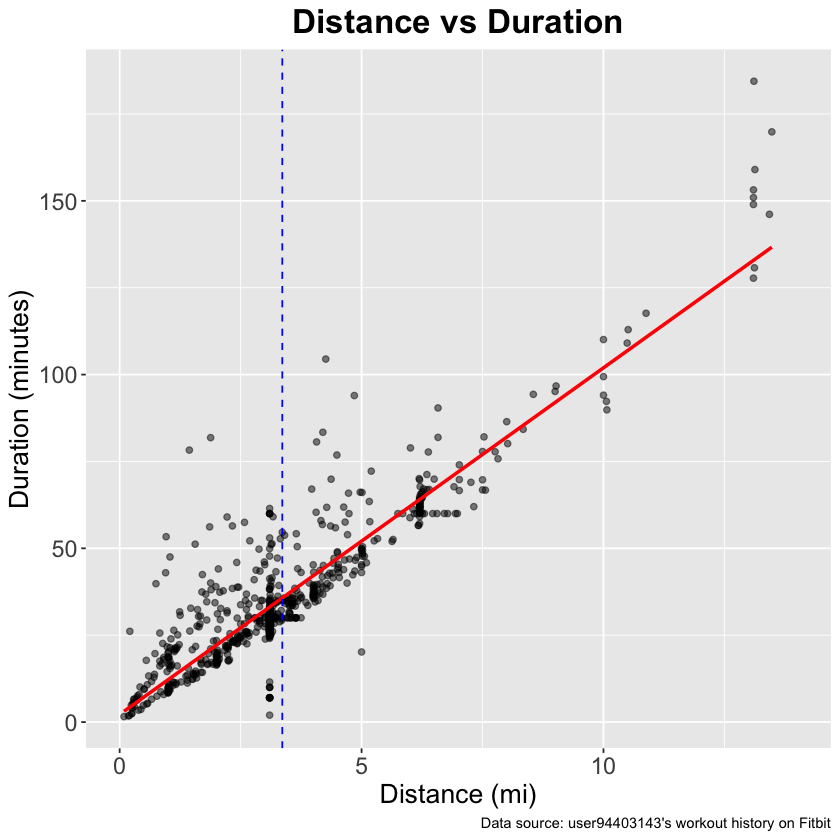

In [439]:
mean_dist <- mean(df2$`Distance (mi)`)

ggplot(data = df2, mapping = aes(x = `Distance (mi)`, y = Duration)) + 
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Distance vs Duration", x = "Distance (mi)", y = "Duration (minutes)",
       caption = "Data source: user94403143's workout history on Fitbit") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14)) +
  geom_vline(xintercept = mean_dist, linetype = "dashed", color = "blue") +
  scale_x_continuous(limits = c(0, ceiling(max(df2$`Distance (mi)`)))) 


### 1. Bar chart of activity types
#### This chart shows the count of each activity type in the dataset:

In [440]:
names(df)

[1] "Date Submitted"         "Workout Date"           "Activity Type"         
 [4] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [7] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
[10] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[13] "Notes"                  "Source"                 "Link"                  
[16] "Duration"               "day"                    "dayofmonth"            
[19] "month"                  "year"                   "mileage"

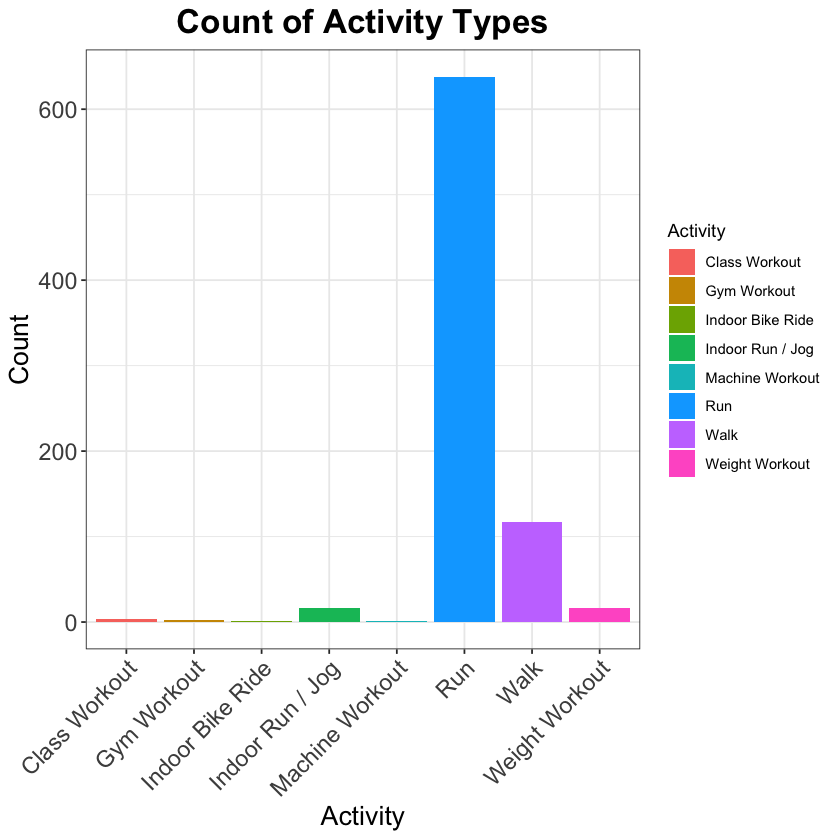

In [441]:
library(ggplot2)

ggplot(df, aes(x = `Activity Type`, fill = `Activity Type`)) +
  geom_bar() +
  scale_fill_discrete(name = "Activity") +
  labs(title = "Count of Activity Types", x = "Activity", y = "Count") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14),
        axis.text.x = element_text(angle = 45, hjust = 1))


### 2. Line chart of average heart rate over time
#### This chart shows the average heart rate over time:

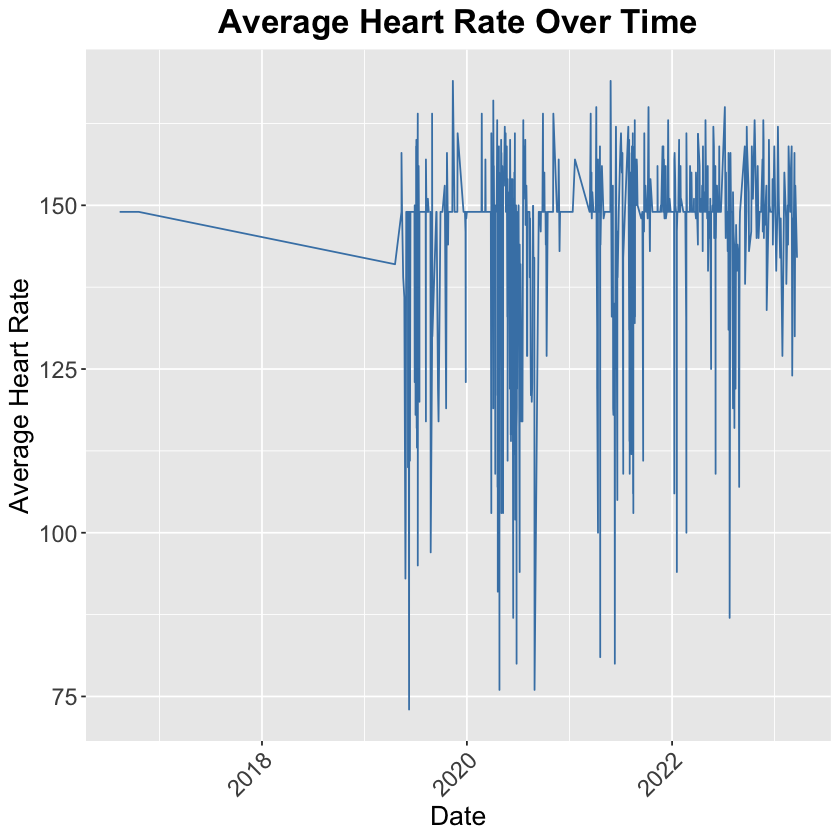

In [442]:
ggplot(df, aes(x = `Workout Date`, y = `Avg Heart Rate`)) +
  geom_line(color = "steelblue") +
  labs(title = "Average Heart Rate Over Time", x = "Date", y = "Average Heart Rate") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14),
        axis.text.x = element_text(angle = 45, hjust = 1))


### 3. Scatter plot of distance vs calories burned
#### This chart shows the relationship between distance and calories burned:

In [443]:
#show the columns
names(df2)

[1] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [4] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
 [7] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[10] "Duration"               "dayofmonth"             "year"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 1 rows containing missing values (`geom_smooth()`)."


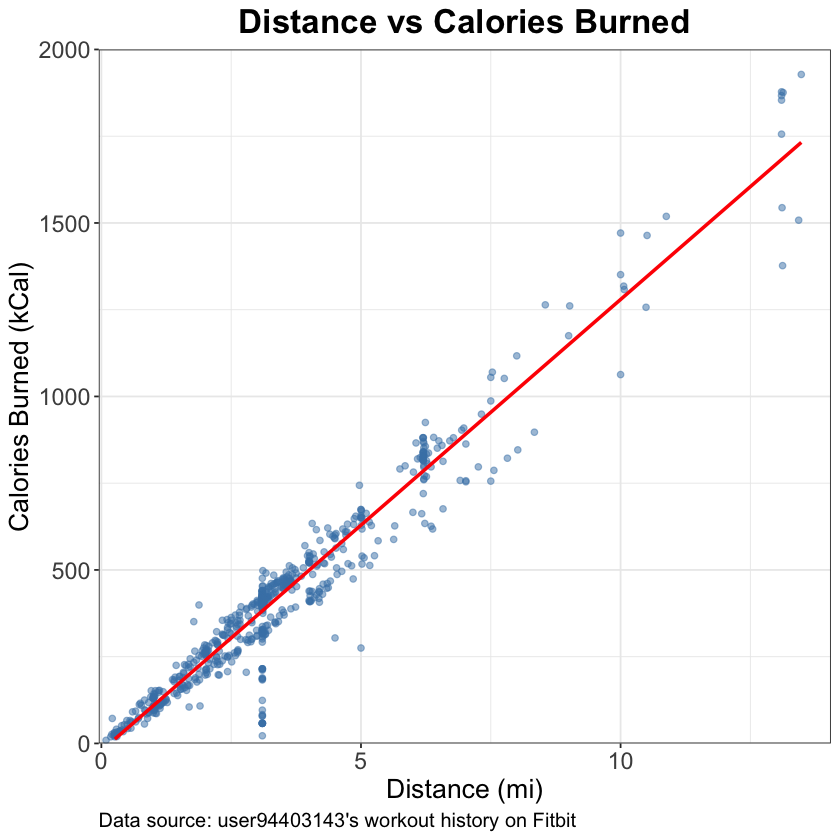

In [444]:
ggplot(data = df2, aes(x = `Distance (mi)`, y = `Calories Burned (kCal)`)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Distance vs Calories Burned", x = "Distance (mi)", y = "Calories Burned (kCal)",
       caption = "Data source: user94403143's workout history on Fitbit") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14),
        plot.caption = element_text(size = 12, hjust = 0)) +
  scale_x_continuous(limits = c(0, ceiling(max(df2$`Distance (mi)`))), expand = c(0, 0.05)) +
  scale_y_continuous(limits = c(0, ceiling(max(df2$`Calories Burned (kCal)`)/100)*100), 
                     expand = c(0, 0.05)) +
  guides(color = FALSE)


### 4. Histogram of durations
#### This chart shows the distribution of workout durations:

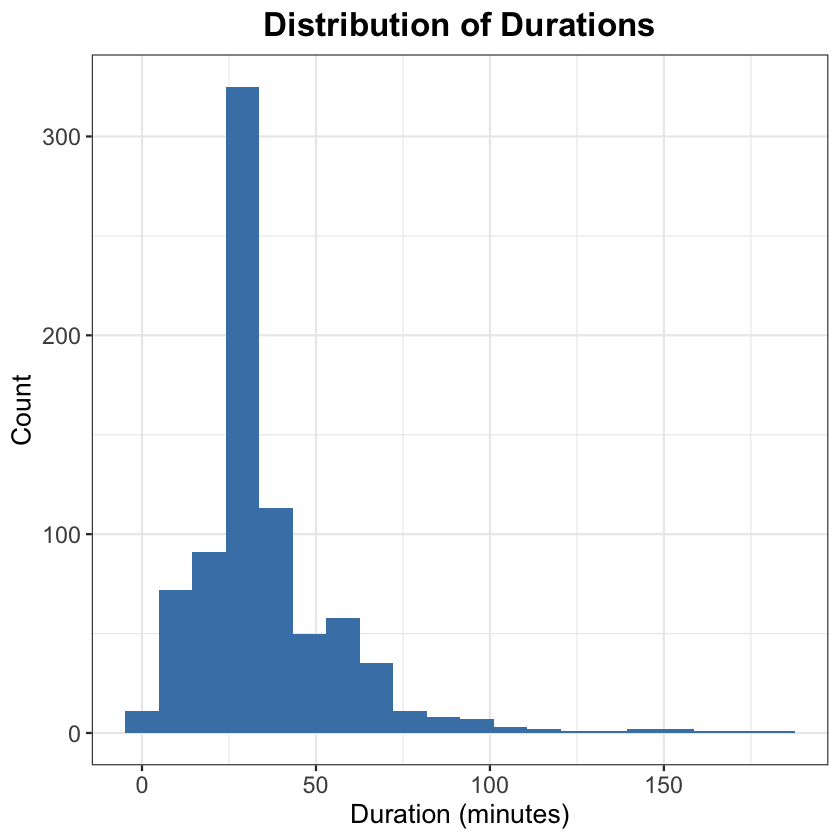

In [445]:
ggplot(data = df2, aes(x = Duration)) +
  geom_histogram(fill = "steelblue", bins = 20) +
  labs(title = "Distribution of Durations", x = "Duration (minutes)", y = "Count") +
  theme_bw(base_size = 14) +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14))


In [446]:
head(df2)

Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Duration,dayofmonth,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
537,4.43,2827,10.63,0.45,5.64,133.30,142,7462,47.12,22,2023
323,3.11,1869,10.03,0.75,5.98,80.54,153,4879,31.15,16,2023
559,4.66,3453,12.34,1.64,4.86,36.69,130,7620,57.55,14,2023
618,5.02,3029,10.05,0.98,5.97,61.25,158,7910,50.48,13,2023
422,3.10,1887,10.15,1.15,5.91,52.33,149,4989,31.45,11,2023
600,4.71,3236,11.45,1.11,5.24,53.86,145,7646,53.93,10,2023


In [447]:
names(df)

[1] "Date Submitted"         "Workout Date"           "Activity Type"         
 [4] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [7] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
[10] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[13] "Notes"                  "Source"                 "Link"                  
[16] "Duration"               "day"                    "dayofmonth"            
[19] "month"                  "year"                   "mileage"

In [448]:
nrow(df2)
nrow(df)

[1] 795

[1] 795

In [449]:
head(df)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),⋯,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year,mileage
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,⋯,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023,FiveK
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,⋯,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023,FiveK
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,⋯,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023,FiveK
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,⋯,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023,FiveK
2023-03-11,2023-03-11,Run,422,3.10,1887,10.15,1.15,5.91,52.33,⋯,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45,Saturday,11,March,2023,FiveK
2023-03-10,2023-03-10,Run,600,4.71,3236,11.45,1.11,5.24,53.86,⋯,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93,Friday,10,March,2023,FiveK


In [450]:
library(dplyr)

df2021 <- df %>% 
  filter(`Date Submitted` >= "2021-01-01", `Date Submitted` < "2022-01-01")

df2022 <- df %>% 
  filter(`Date Submitted` >= "2022-01-01")


In [451]:
head(df, 4)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),⋯,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year,mileage
<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,⋯,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023,FiveK
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,⋯,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023,FiveK
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,⋯,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023,FiveK
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,⋯,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023,FiveK


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: colour
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


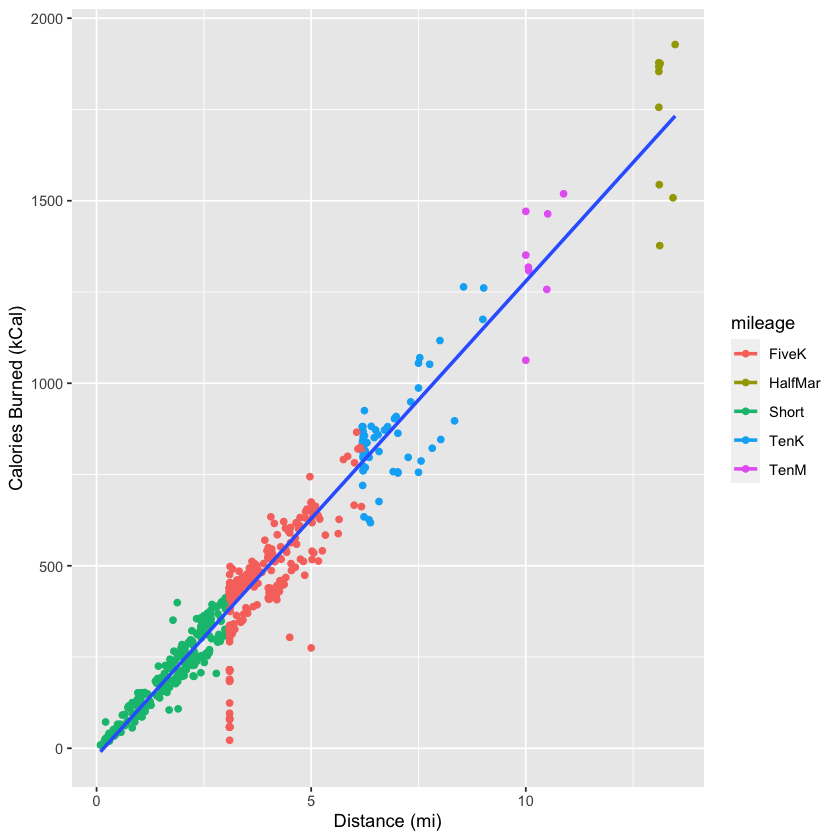

In [452]:
ggplot(data = df, mapping = aes(x = `Distance (mi)`, y = `Calories Burned (kCal)`, color = mileage)) + 
  geom_point() + 
  geom_smooth(aes(color = year), method = "lm", se = FALSE)


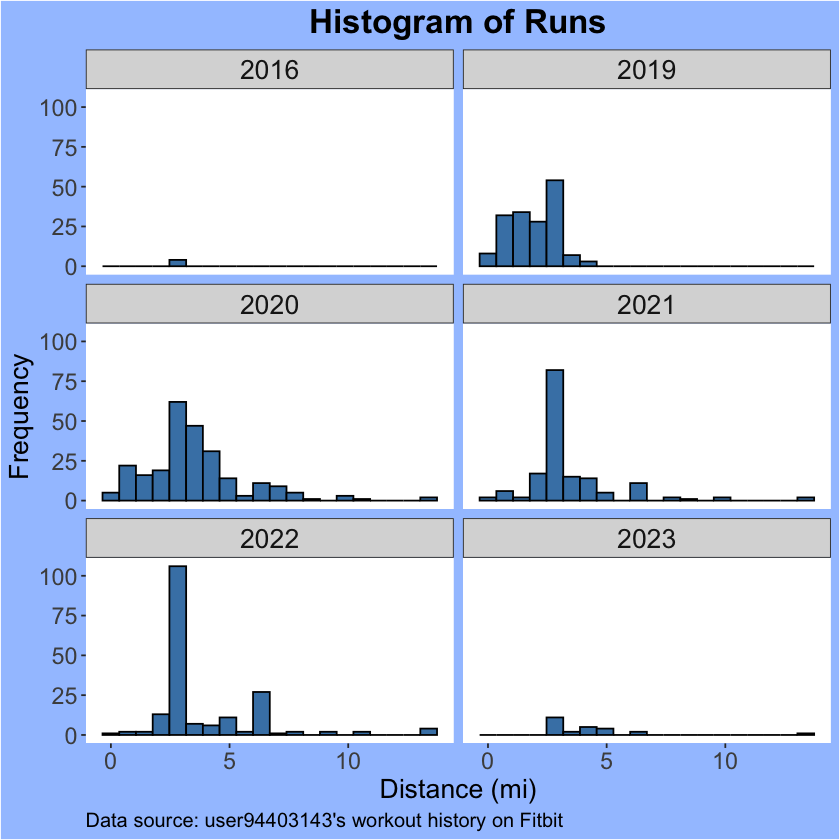

In [453]:
library(ggplot2)

ggplot(data = df, aes(x = `Distance (mi)`)) +
  geom_histogram(fill = "steelblue", color = "black", bins = 20) +
  ggtitle("Histogram of Runs") +
  facet_wrap(~ year, ncol = 2) +
  labs(x = "Distance (mi)", y = "Frequency", caption = "Data source: user94403143's workout history on Fitbit") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14),
        strip.text = element_text(size = 16),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        plot.caption = element_text(size = 12, hjust = 0),
        plot.background = element_rect(fill = "#a3c5ff"))


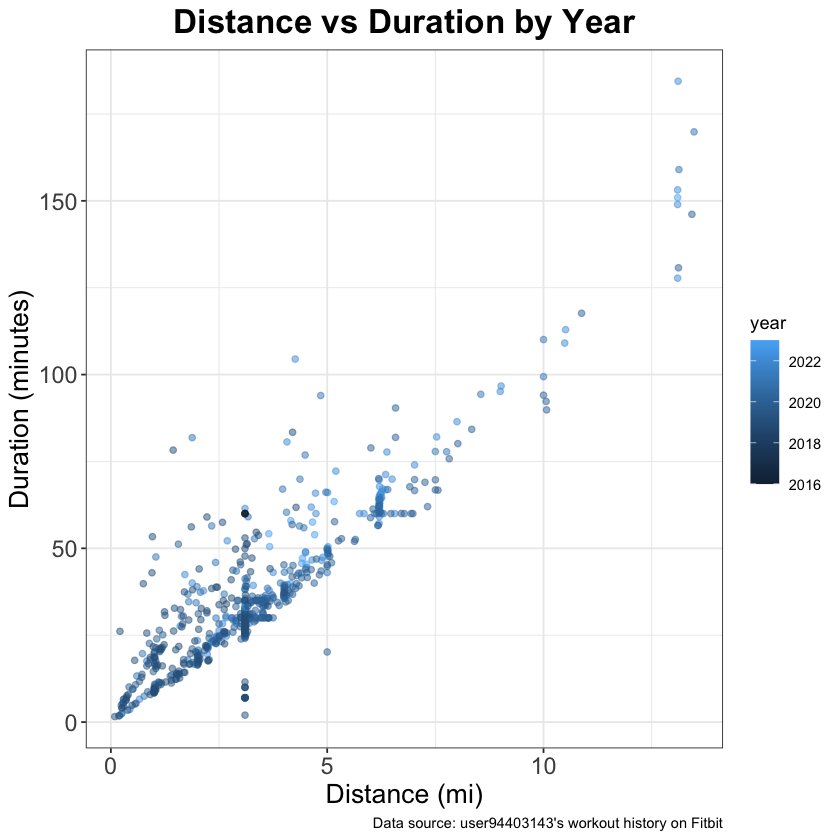

In [454]:
ggplot(data = df, aes(x = `Distance (mi)`, y = Duration, color = year)) + 
  geom_point(alpha = 0.5) +
  labs(title = "Distance vs Duration by Year", x = "Distance (mi)", y = "Duration (minutes)",
       caption = "Data source: user94403143's workout history on Fitbit") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14)) 


Warning message:
"Continuous x aesthetic
i did you forget `aes(group = ...)`?"


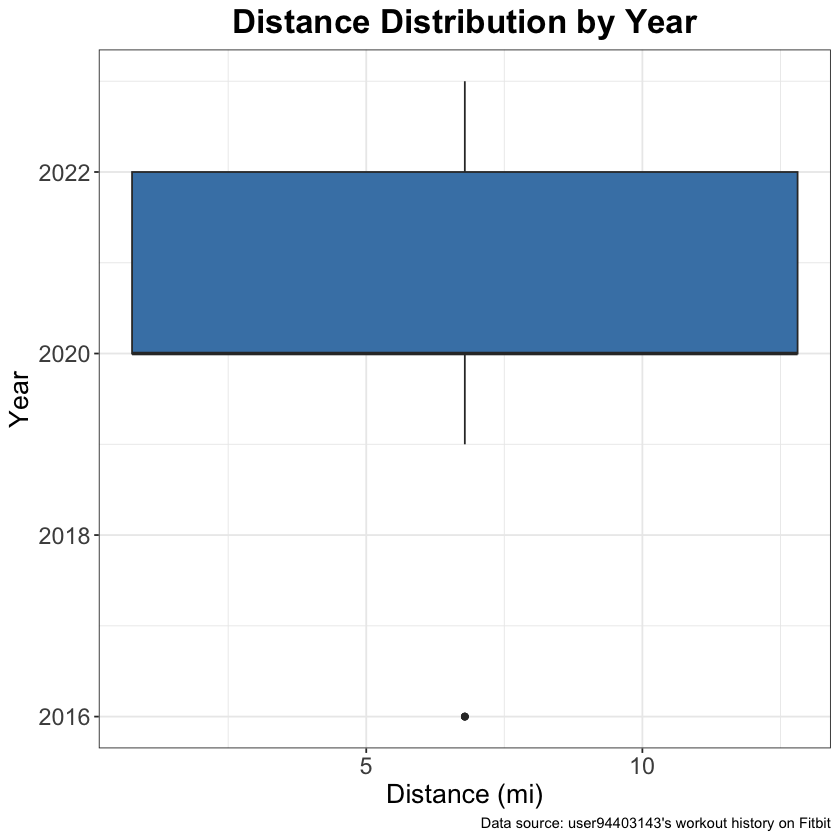

In [455]:
ggplot(data = df, aes(x = `Distance (mi)`, y = `year`)) + 
  geom_boxplot(fill = "steelblue") +
  labs(title = "Distance Distribution by Year", x = "Distance (mi)", y = "Year",
       caption = "Data source: user94403143's workout history on Fitbit") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14))


In [456]:
nrow(df)

[1] 795

## Update my Google Data Studio Data File

In [457]:
#install.packages("reticulate")
library(reticulate)
#use_python("C:/ProgramData/Anaconda3/python.exe")
#use_python("C:/users/coleb/mambaforge/python.exe")
#py_run_file("C:/Users/coleb/OneDrive/Coraline/MapMyRunProjects/csv to Google Sheets py script.py")

use_python("/usr/local/bin/python3")
py_run_file("/Users/cole/Library/CloudStorage/OneDrive-Personal/Coraline/MapMyRunProjects/csv to Google Sheets py script.py")

#/Library/Frameworks/R.framework/Versions/4.2/Resources/Rscript
#/Users/cole/opt/anaconda3/python

In [458]:
# df4 <- googlesheets4::read_sheet("https://docs.google.com/spreadsheets/d/19EApq3X76jXNkxdsE3EEF2xvjBzS7RMxeMZAhniHCds/edit?usp=sharing")

## Amazon Halo Data

In [459]:
hdf <- read.csv("/Users/cole/Library/CloudStorage/OneDrive-Personal/Coraline/Resources/csv data/Activity_Workouts_1970-01-01--2022-09-26_6faf4d87-3a4f-448b-a4bc-2e8af30367ac.csv")

In [460]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,⋯,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,⋯,No Data,No Data,No Data,1.0.129673,ios,16,5853515,5853515,Not Applicable,User Logged
2,2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,⋯,No Data,No Data,No Data,1.0.129673,ios,16,2940000,2940000,Not Applicable,User Logged


In [461]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [462]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515
2,2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000


### Test Split Date

In [463]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [464]:
row.names(dtparts) = NULL

In [465]:
install.packages("chron")
library(chron)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpdkrUce/downloaded_packages


In [466]:
dates = dtparts[,1]
times = dtparts[,2]

In [467]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [468]:
names(dates)[names(dates) == "dates"] <- "Date"

In [469]:
cadf <- as.data.frame(cadf)

In [470]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>
2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25
2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000,2022-09-25
2022-09-24T18:51:13.409Z,2022-09-24T19:40:03.623Z,WORKOUT,RUNNING,Automatic,-6,94.1595925,2763623.0,120000.0,182,160,7576,920,No Data,No Data,No Data,1.0.129673,2930214,2930214,2022-09-25
2022-09-24T17:03:37.541Z,2022-09-24T17:14:35.069Z,WORKOUT,WALKING,Automatic,-6,1.3687158333333334,No Data,60000.0,112,82,690,66,No Data,No Data,No Data,1.0.129673,657528,657528,2022-09-25
2022-09-23T22:35:44.821Z,2022-09-23T23:10:39.000Z,WORKOUT,WALKING,Automatic,-6,7.412649166666666,No Data,360000.0,113,99,2140,256,No Data,No Data,No Data,1.0.129673,2094179,2094179,2022-09-25
2022-09-23T20:00:16.880Z,2022-09-23T20:34:07.786Z,WORKOUT,RUNNING,Automatic,-6,60.1657,1680000.0,247786.0,161,138,4797,514,No Data,No Data,No Data,1.0.129673,2030906,2030906,2022-09-25
2022-09-23T13:37:43.386Z,2022-09-23T13:59:39.472Z,WORKOUT,WALKING,Automatic,-6,3.763845,No Data,180000.0,114,79,1253,119,No Data,No Data,No Data,1.0.129673,1316086,1316086,2022-09-25
2022-09-21T21:48:09.949Z,2022-09-21T22:01:07.013Z,WORKOUT,WALKING,Automatic,-6,2.45,No Data,120000.0,97,84,853,74,No Data,No Data,No Data,1.0.129673,777064,777064,2022-09-25
2022-09-21T21:20:16.529Z,2022-09-21T21:37:12.502Z,WORKOUT,WALKING,Automatic,-6,7.3862258333333335,No Data,420000.0,104,88,1113,106,No Data,No Data,No Data,1.0.129673,1015973,1015973,2022-09-25


In [471]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [472]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [473]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25,20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515
2,2022-09-24,19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000


In [474]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [475]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [476]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [477]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515


In [478]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [479]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [480]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25 20:05:37,2022-09-26 02:05:37


In [481]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [482]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25 20:05:37,2022-09-26,02:05:37


In [483]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [484]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>
1,20:05:37,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,5853515,5853515,2022-09-25 20:05:37,2022-09-26
2,19:41:00,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,2940000,2940000,2022-09-24 19:41:00,2022-09-25


In [485]:
names(cadf)[names(cadf) == "Date 2"] <- "Date"

In [486]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>
1,20:05:37,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,5853515,5853515,2022-09-25 20:05:37,2022-09-26
2,19:41:00,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,2940000,2940000,2022-09-24 19:41:00,2022-09-25


In [487]:
library(lubridate)
#df$Date <- as.Date(df$Date)
cadf <- data.frame(cadf)
cadf$Date <- as.Date(cadf$Date)

In [488]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<date>
1,20:05:37,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,5853515,5853515,2022-09-25 20:05:37,2022-09-26
2,19:41:00,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,2940000,2940000,2022-09-24 19:41:00,2022-09-25


In [489]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [490]:
mymerge <- merge(x = cadf2, y = df, by.x = "Date", by.y = "Workout Date", all = TRUE)

In [491]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 40

[1] 20

[1] 21

[1] 867

[1] 184

[1] 795

In [492]:
mymerge <- mymerge[order(mymerge$Date),]

In [493]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [494]:
head(mymerge, 2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Steps.y,Notes,Source,Link,Duration,day,dayofmonth,month,year,mileage
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,2016-08-12,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4713.5,b'',MyFitnessPal,http://www.mapmyfitness.com/workout/1672575152,60,Friday,12,August,2016,FiveK
2,2016-09-26,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4713.5,b'',MyFitnessPal,http://www.mapmyfitness.com/workout/1773264605,60,Monday,26,September,2016,FiveK


In [495]:
colnames(mymerge)

[1] "Date"                     "Times"                   
 [3] "End.Time"                 "Session.Type"            
 [5] "Session.Subtype"          "Creation.Method"         
 [7] "Local.Time.Zone.Offset"   "Activity.Score"          
 [9] "Intense.Duration..ms."    "Moderate.Duration..ms."  
[11] "Max.Heart.Rate..bpm."     "Average.Heart.Rate..bpm."
[13] "Steps.x"                  "Calories"                
[15] "Pace..m.s."               "Distance..m."            
[17] "Elevation..m."            "Active.Time..ms."        
[19] "Total.Duration..ms."      "DTS"                     
[21] "Date Submitted"           "Activity Type"           
[23] "Calories Burned (kCal)"   "Distance (mi)"           
[25] "Workout Time (seconds)"   "Avg Pace (min/mi)"       
[27] "Max Pace (min/mi)"        "Avg Speed (mi/h)"        
[29] "Max Speed (mi/h)"         "Avg Heart Rate"          
[31] "Steps.y"                  "Notes"                   
[33] "Source"                   "Link"                    
[35] "Duration"                 "day"                     
[37] "dayofmonth"               "month"                   
[39] "year"                     "mileage"

## EDA with my merged data set

In [496]:
mm22 <- mymerge %>%
  select(`Distance (mi)`, Duration, `Activity.Score`, Steps.y, `Avg Heart Rate`, `Avg Speed (mi/h)`, `Calories Burned (kCal)`)

## Plot EDA

In [497]:
df2 <- df[sapply(df, is.numeric)]

In [498]:
colnames(df2)

[1] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [4] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
 [7] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[10] "Duration"               "dayofmonth"             "year"

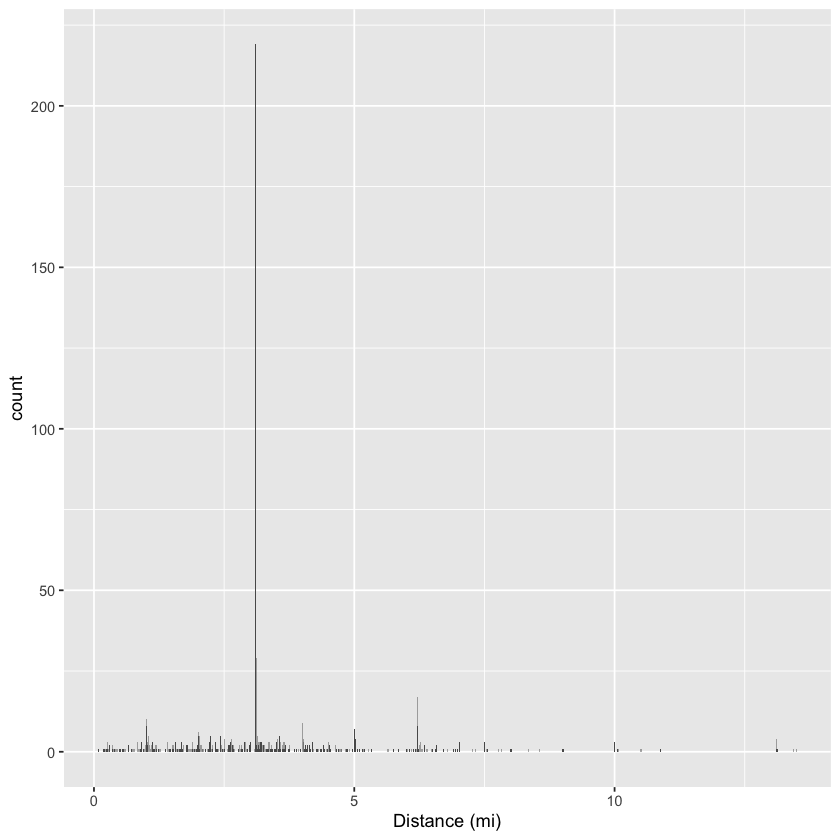

In [499]:
ggplot(data = df2, mapping = aes(x = `Distance (mi)`)) +
  geom_bar()


Warning message:
"The following aesthetics were dropped during statistical transformation: colour
i This can happen when ggplot fails to infer the correct grouping structure in
  the data.
i Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


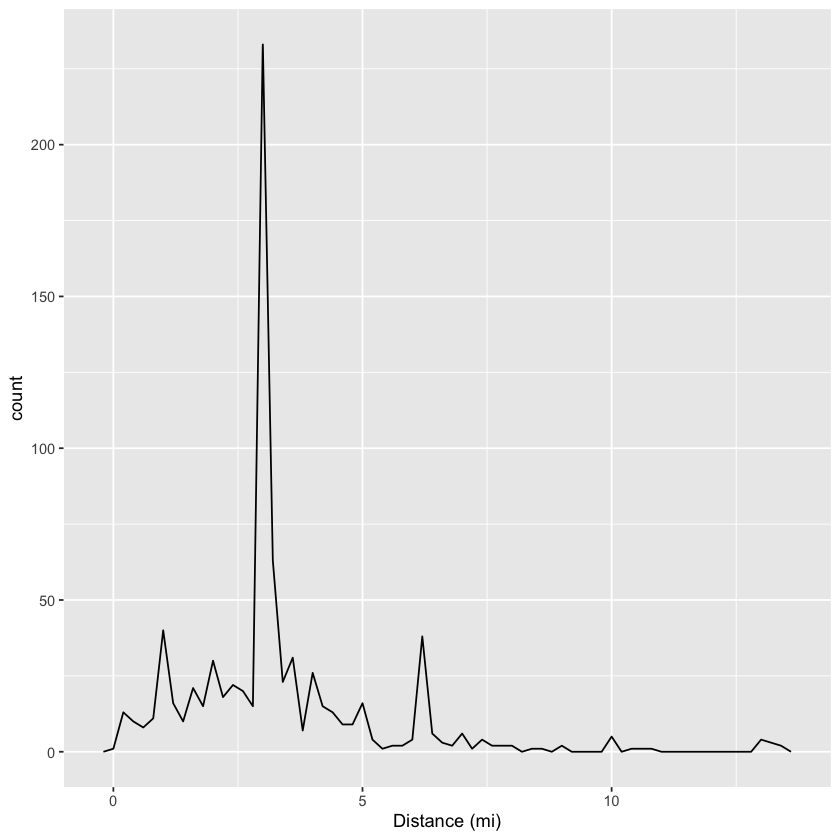

In [500]:
ggplot(data = df2, mapping = aes(x = `Distance (mi)`, colour = Duration)) +
  geom_freqpoly(binwidth = 0.2)


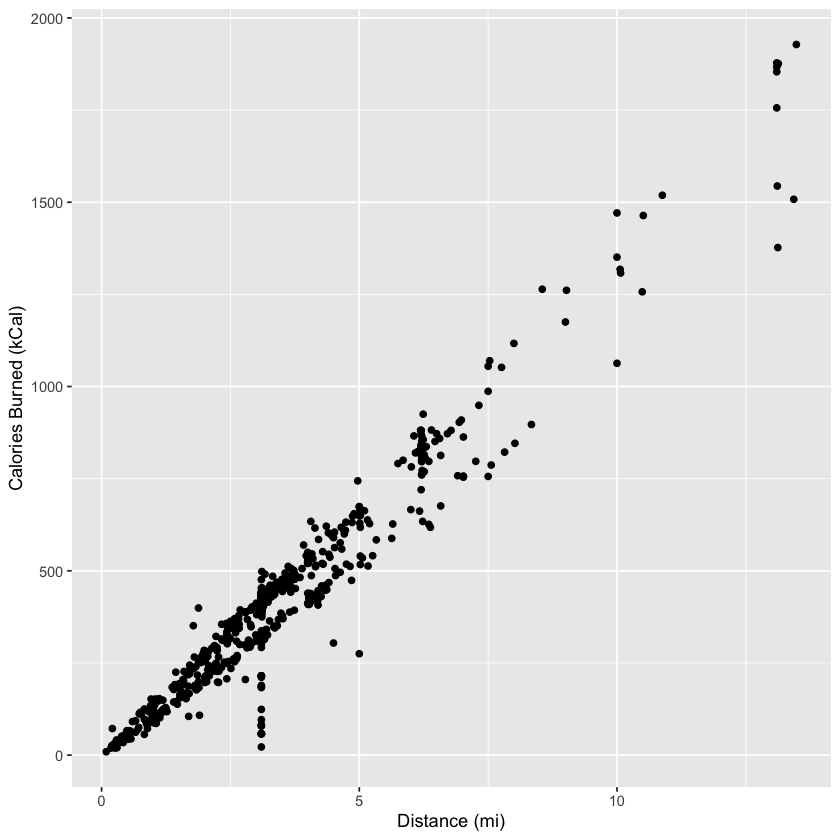

In [501]:
ggplot(data = df2, mapping = aes(x = `Distance (mi)`, y = `Calories Burned (kCal)`)) + 
  geom_point()

In [502]:
cormat <- round(cor(df2),2)
head(cormat)


,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Duration,dayofmonth,year
Calories Burned (kCal),1.00,0.96,0.89,-0.22,-0.09,0.21,0.15,0.21,0.94,0.89,0.01,0.39
Distance (mi),0.96,1.00,0.90,-0.25,-0.09,0.23,0.15,0.20,0.97,0.90,0.00,0.30
Workout Time (seconds),0.89,0.90,1.00,0.06,-0.04,-0.13,0.16,0.00,0.92,1.00,0.00,0.25
Avg Pace (min/mi),-0.22,-0.25,0.06,1.00,0.08,-0.76,-0.04,-0.34,-0.15,0.06,-0.07,-0.17
Max Pace (min/mi),-0.09,-0.09,-0.04,0.08,1.00,-0.14,-0.12,-0.05,-0.08,-0.04,0.05,-0.07
Avg Speed (mi/h),0.21,0.23,-0.13,-0.76,-0.14,1.00,0.03,0.52,0.11,-0.13,0.06,0.15


In [503]:
install.packages("reshape2")
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpdkrUce/downloaded_packages


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Calories Burned (kCal),Calories Burned (kCal),1.00
2,Distance (mi),Calories Burned (kCal),0.96
3,Workout Time (seconds),Calories Burned (kCal),0.89
4,Avg Pace (min/mi),Calories Burned (kCal),-0.22
5,Max Pace (min/mi),Calories Burned (kCal),-0.09
6,Avg Speed (mi/h),Calories Burned (kCal),0.21


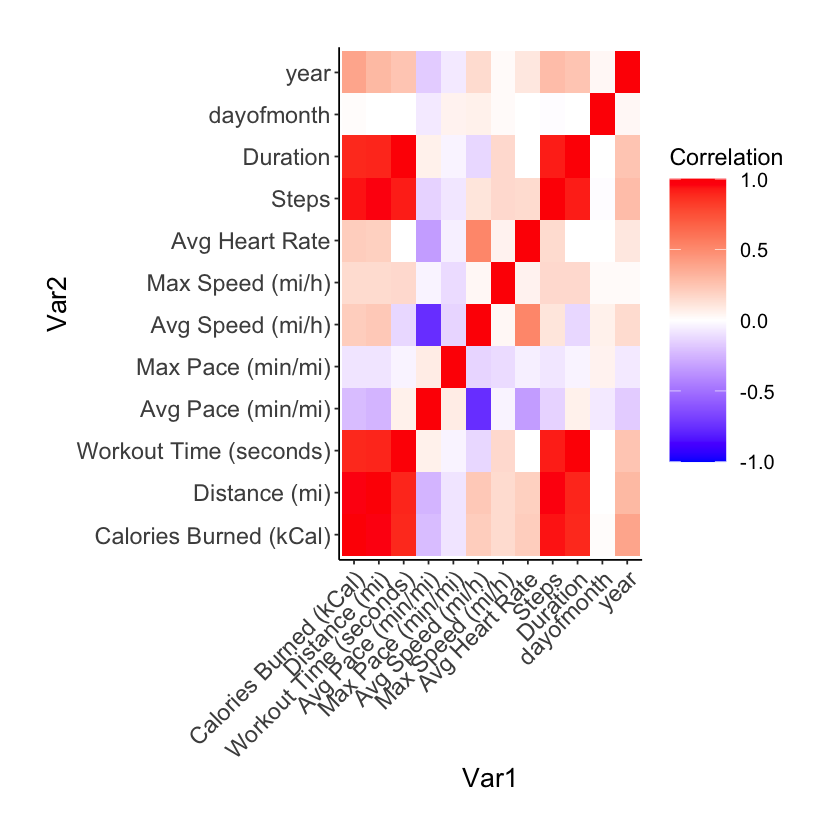

In [504]:
library(ggplot2)

ggplot(data = melted_cormat, aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limits = c(-1, 1), name = "Correlation") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black", size = 0.5),
        legend.key.size = unit(1.2, "cm"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"))


In [505]:
linear_model <- lm(Duration ~ `Distance (mi)`, data = df2)

In [506]:
colnames(linear_model)

NULL

In [507]:
summary(linear_model)


Call:
lm(formula = Duration ~ `Distance (mi)`, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.893  -4.721  -2.645   1.518  61.707 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.2000     0.6860   3.207  0.00139 ** 
`Distance (mi)`   9.9746     0.1754  56.853  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.879 on 793 degrees of freedom
Multiple R-squared:  0.803,	Adjusted R-squared:  0.8027 
F-statistic:  3232 on 1 and 793 DF,  p-value: < 2.2e-16


In [508]:
# Print the column names in the df2 data frame
colnames(df2)

[1] "Calories Burned (kCal)" "Distance (mi)"          "Workout Time (seconds)"
 [4] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
 [7] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[10] "Duration"               "dayofmonth"             "year"

In [509]:
# Create a data frame with the new distances
new_distance <- data.frame(`Distance` = c(15, 20, 26.2))

# Rename the "Distance (mi)" column to "Distance" to match the model formula
colnames(df2)[2] <- 'Distance'

# Predict the duration for the new distances using the linear model
pred <- predict(lm(Duration ~ Distance, data = df2), newdata = new_distance, interval = "confidence")

# Add the predicted times to the new_distance data frame
new_distance$Duration <- pred[, 1]

# Format the predicted durations to display minutes and seconds
new_distance$Duration <- paste0(floor(new_distance$Duration), "m ", round((new_distance$Duration - floor(new_distance$Duration)) * 60), "s")

# Print the new_distance data frame with the formatted durations
print(new_distance)


  Distance Duration
1     15.0 151m 49s
2     20.0 201m 42s
3     26.2 263m 32s


In [510]:
halftimes <- df2[df2$Distance > 13.09,]
#halftimes2 <- mm23[mm23$Distance > 13.09,]


In [511]:
head(halftimes, 20)

Calories Burned (kCal),Distance,Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Duration,dayofmonth,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1878,13.10,9056,11.52,0.69,5.21,86.84,140,21488,150.93,7,2023
1756,13.10,7665,9.75,0.45,6.15,134.62,145,20519,127.75,5,2022
1867,13.10,8937,11.37,0.26,5.28,231.49,146,22295,148.95,10,2022
1544,13.11,11065,14.07,7.71,4.27,7.78,140,22531,184.42,20,2022
1854,13.10,9189,11.69,0.68,5.13,88.30,156,22087,153.15,6,2022
1876,13.13,9540,12.11,1.35,4.96,44.43,148,22488,159.00,5,2021
1928,13.48,10191,12.60,0.48,4.76,126.23,144,22719,169.85,21,2021
1508,13.43,8767,10.87,0.13,5.52,448.07,145,23604,146.12,30,2020
1377,13.12,7844,9.96,1.10,6.02,54.57,150,21427,130.73,11,2020


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


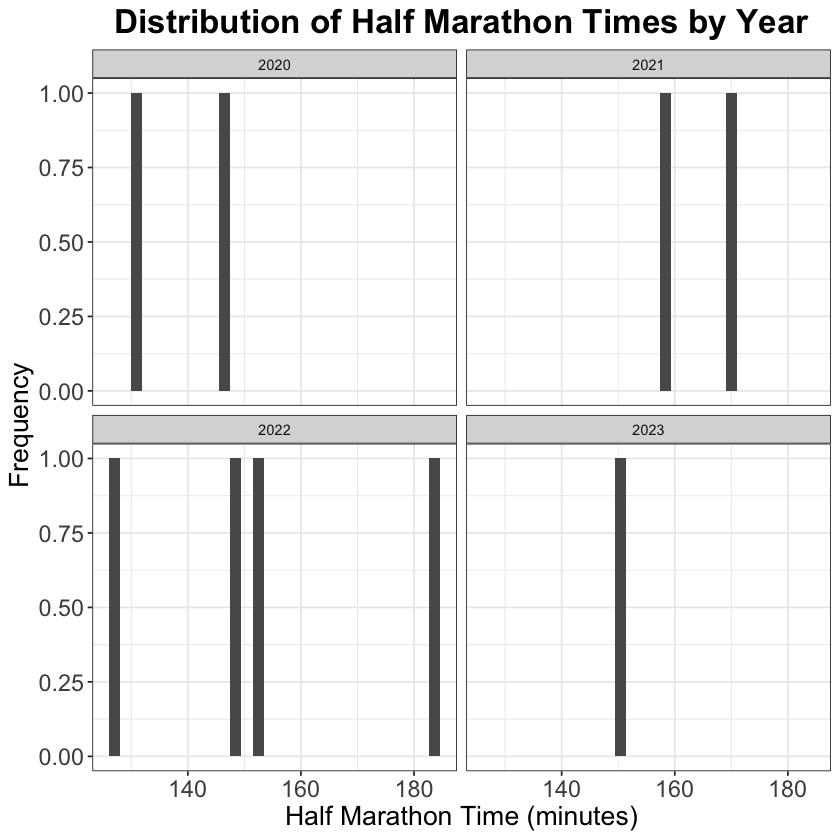

In [513]:
ggplot(halftimes, aes(x = Duration)) + 
  geom_histogram() + 
  facet_wrap(vars(year)) +
  labs(title = "Distribution of Half Marathon Times by Year", x = "Half Marathon Time (minutes)", y = "Frequency") +
  theme_bw() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 14))


In [514]:
linear_model$coefficients

(Intercept) `Distance (mi)` 
       2.200037        9.974603

In [516]:
colnames(df2)

[1] "Calories Burned (kCal)" "Distance"               "Workout Time (seconds)"
 [4] "Avg Pace (min/mi)"      "Max Pace (min/mi)"      "Avg Speed (mi/h)"      
 [7] "Max Speed (mi/h)"       "Avg Heart Rate"         "Steps"                 
[10] "Duration"               "dayofmonth"             "year"

In [522]:
mlr <- lm(Distance ~ Duration + `Avg Speed (mi/h)`, data = df2)

In [523]:
summary(mlr)


Call:
lm(formula = Distance ~ Duration + `Avg Speed (mi/h)`, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1782 -0.1540 -0.0301  0.1595  2.3937 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.7319311  0.0928904  -29.41   <2e-16 ***
Duration            0.0847836  0.0008577   98.85   <2e-16 ***
`Avg Speed (mi/h)`  0.5358409  0.0142789   37.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5328 on 792 degrees of freedom
Multiple R-squared:  0.9291,	Adjusted R-squared:  0.9289 
F-statistic:  5188 on 2 and 792 DF,  p-value: < 2.2e-16


In [524]:
mlr$coefficients

(Intercept)           Duration `Avg Speed (mi/h)` 
       -2.73193108         0.08478364         0.53584090

In [535]:
library(ggplot2)

df2$Avg_Speed <- df2$'Avg Speed (mi/h)'

exp_model <- glm(Distance ~ exp(Duration) + Avg_Speed, data = df2, family = "gaussian")




# Create a data frame with x-values for the curve
curve_data <- data.frame(Duration = seq(min(df2$Duration), max(df2$Duration), length.out = 100))

# Use predict() to get predicted values for y (Distance) based on the exponential regression model
curve_data$Distance <- predict(exp_model, newdata = curve_data)

# Plot the original data points and the exponential regression curve
ggplot(df2, aes(x = Duration, y = Distance)) +
  geom_point(alpha = 0.5) +
  geom_line(data = curve_data, aes(x = Duration, y = Distance), color = "red") +
  labs(title = "Exponential Regression: Distance vs Duration", x = "Duration (minutes)", y = "Distance (miles)") +
  theme_bw()


ERROR: Error in eval(predvars, data, env): object 'Avg_Speed' not found


In [ ]:
install.packages('mgcv')
library(mgcv)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpWdRzPn/downloaded_packages


`geom_smooth()` using formula = 'y ~ x'


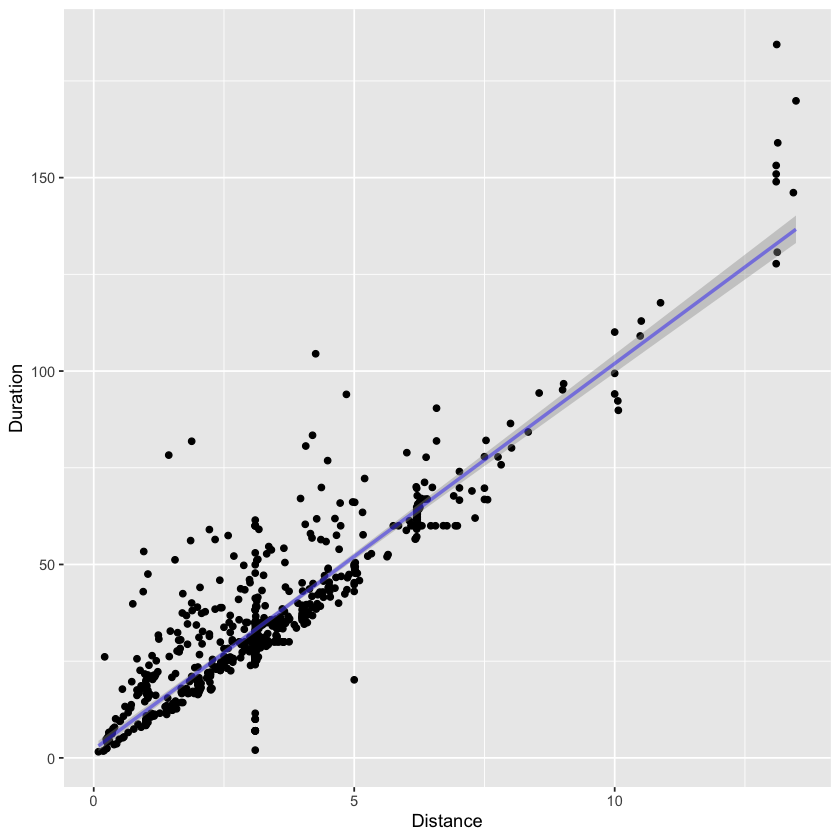

In [537]:
ggplot(df2, aes(x = Distance, y = Duration)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "#1900fa6e")

In [ ]:
# score_model <- lm(duration ~ Distance, data = mm22)
# mm22$predicted_duration <- predict(score_model, mm22$Distance, interval = "confidence")

# ggplot(mm22, aes(x = duration, y = Distance)) +
#   geom_smooth(method = "lm", se = FALSE, color = "red") +  # Plot regression slope
#   geom_segment(aes(xend = duration, yend = predicted_duration), alpha = .2) +  # alpha to fade lines
#   geom_point() +
#   geom_point(aes(y = predicted_duration), shape = 1) +
#   theme_bw()  # Add theme for cleaner look

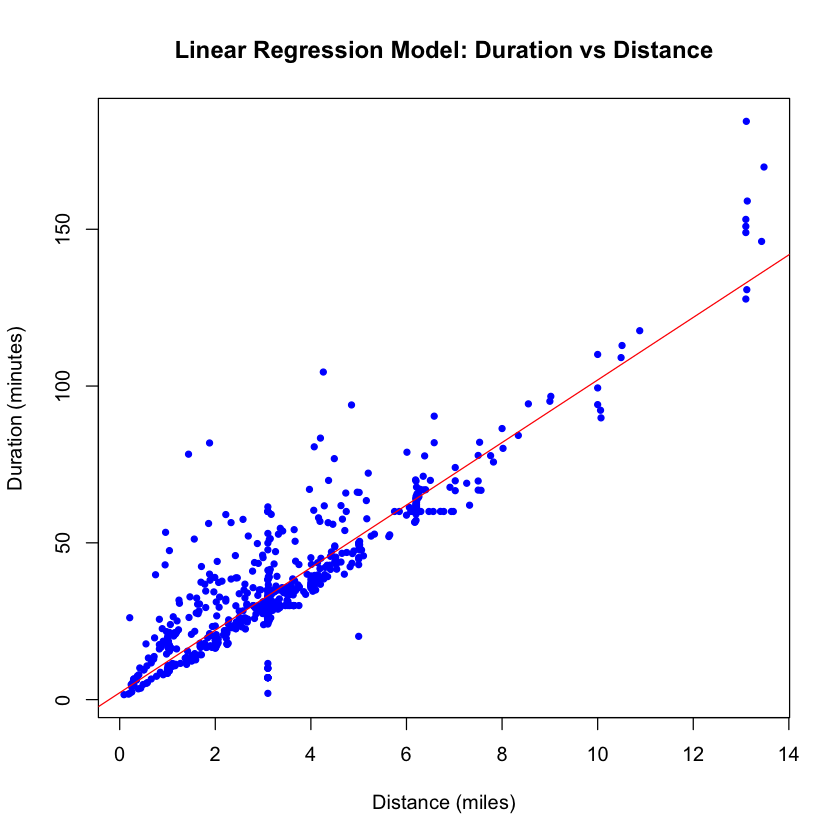

In [543]:
# Fit the linear regression model
linear_model <- lm(Duration ~ Distance, data = df2)

# Plot the linear regression line and data
plot(df2$Distance, df2$Duration, col = "blue", pch = 20, 
     main = "Linear Regression Model: Duration vs Distance", 
     xlab = "Distance (miles)", ylab = "Duration (minutes)")
abline(linear_model, col = "red")


## Extra

In [ ]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noisy.y <- y + noise

`geom_smooth()` using formula = 'y ~ x'


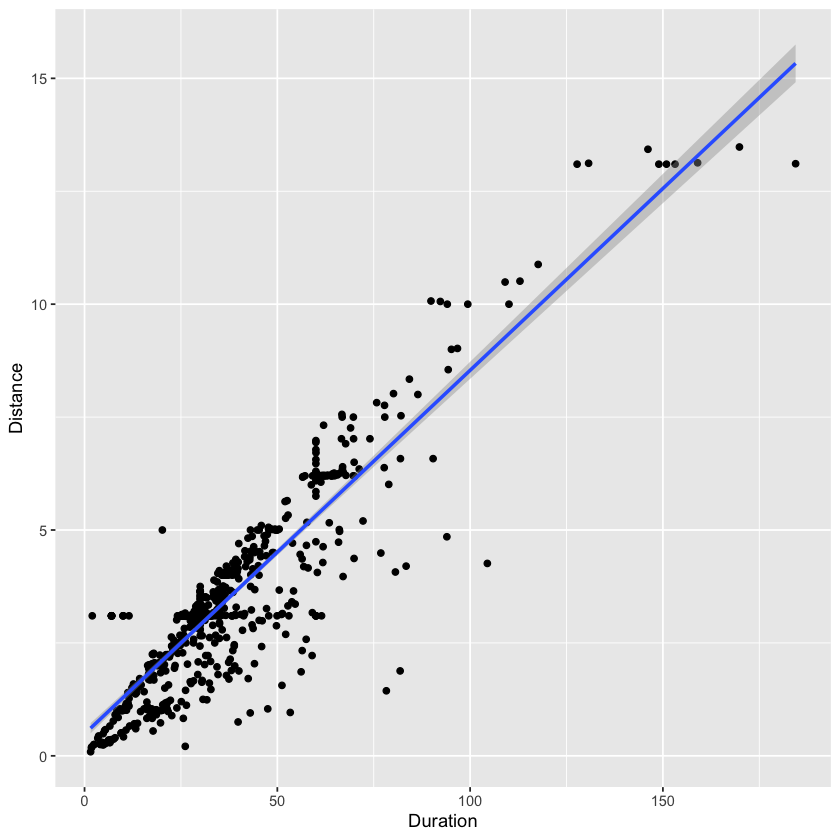

In [544]:
# fit linear model
ggplot(df2, aes(Duration, Distance)) + 
  geom_point() + 
  geom_smooth(method = "lm")


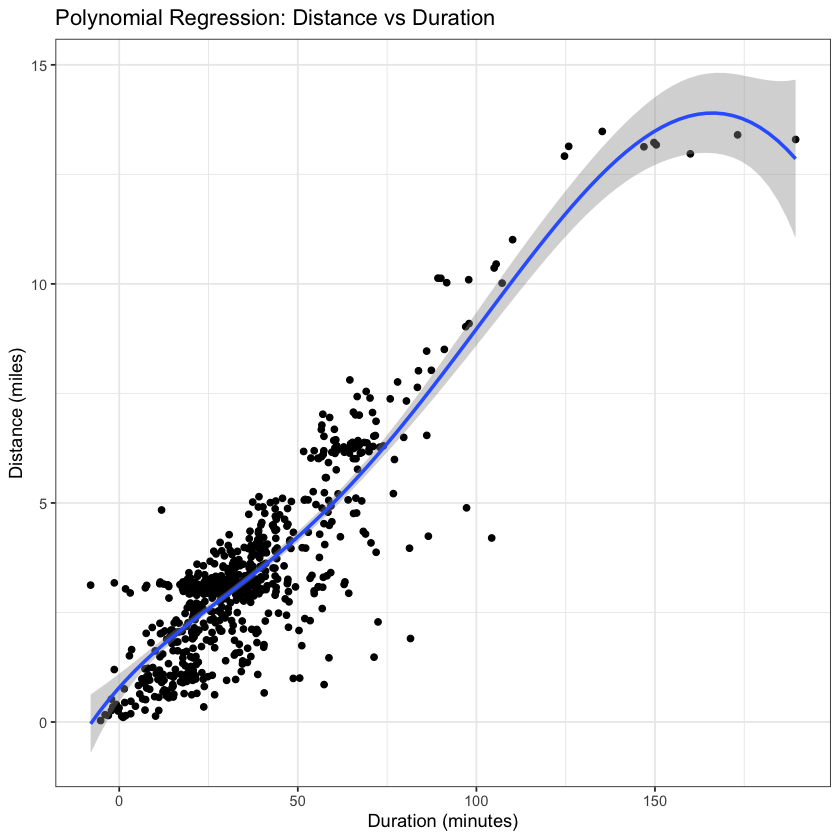

In [545]:
# generate noisy data using df2
set.seed(20)
df2_noisy <- df2 %>%
  mutate(Duration = Duration + rnorm(n(), mean = 0, sd = 5)) %>%
  mutate(Distance = Distance + rnorm(n(), mean = 0, sd = 0.1))

# plot noisy data with polynomial regression line
ggplot(df2_noisy, aes(Duration, Distance)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 5)) +
  labs(title = "Polynomial Regression: Distance vs Duration", x = "Duration (minutes)", y = "Distance (miles)") +
  theme_bw()


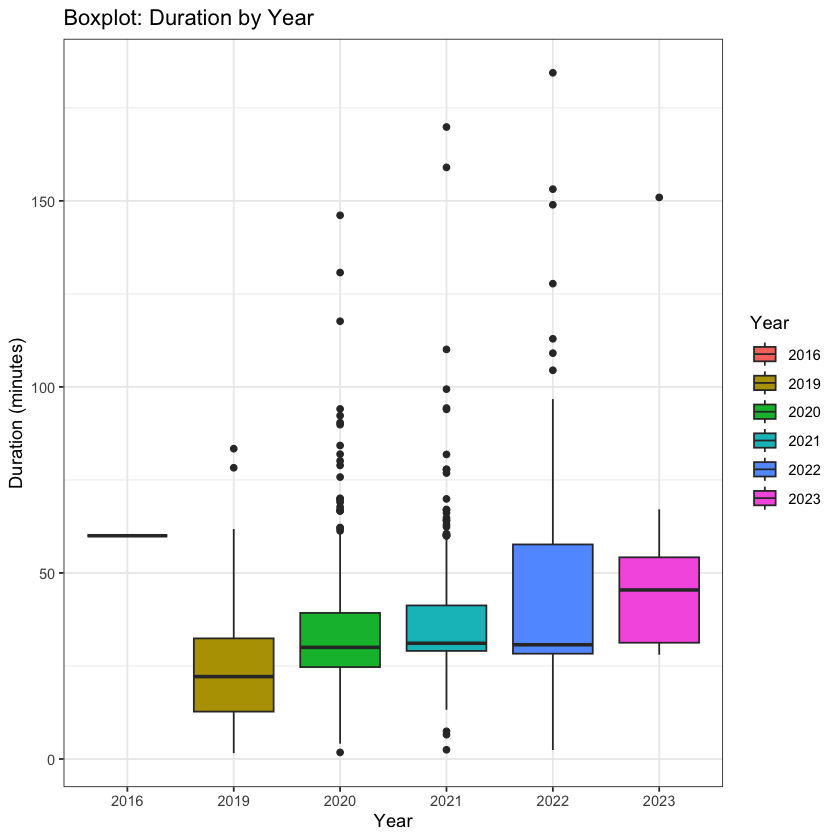

In [546]:
ggplot(df2, aes(x = as.factor(year), y = Duration, fill = as.factor(year))) +
  geom_boxplot() +
  labs(title = "Boxplot: Duration by Year", x = "Year", y = "Duration (minutes)") +
  scale_fill_discrete(name = "Year") +
  theme_bw()


In [547]:
install.packages("GGally")
library(GGally)

also installing the dependency 'reshape'





The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpdkrUce/downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



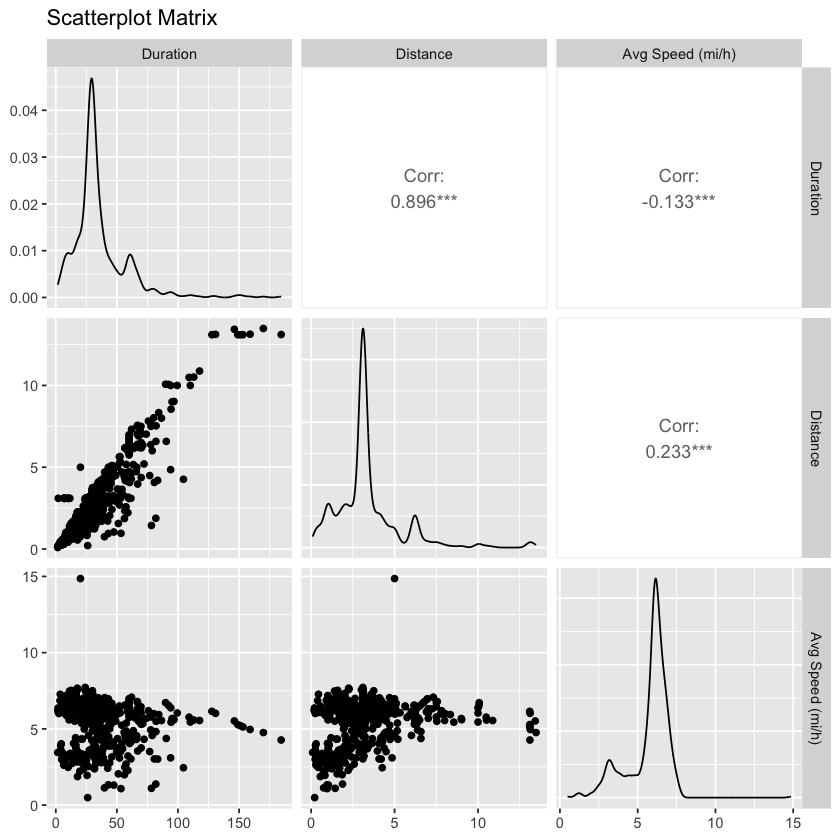

In [549]:
library(GGally)

ggpairs(df2[, c("Duration", "Distance", "Avg Speed (mi/h)")], title = "Scatterplot Matrix")


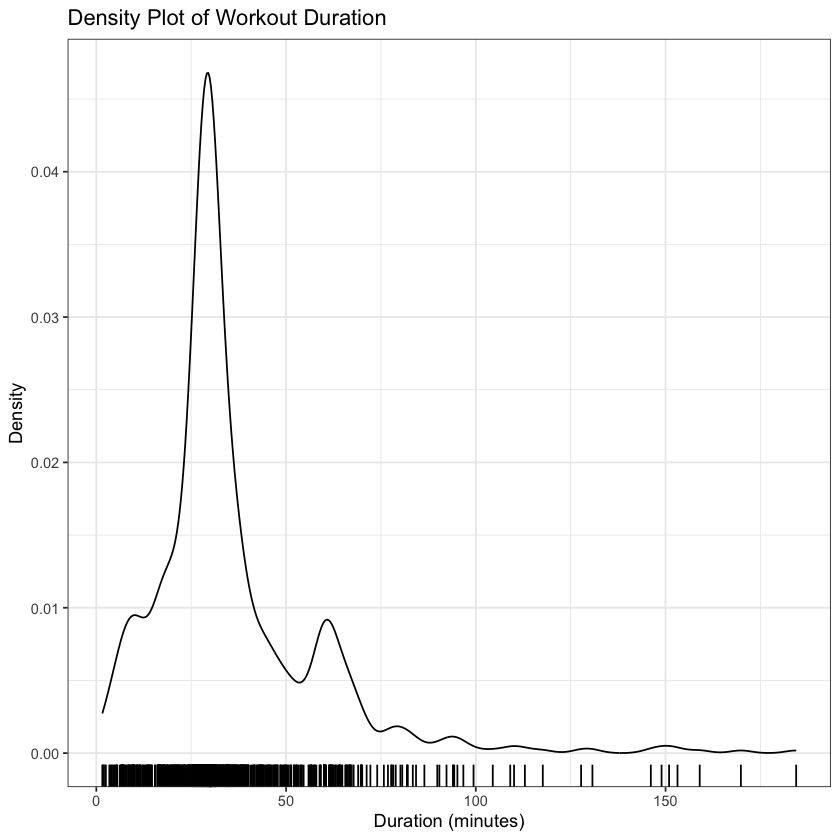

In [550]:
ggplot(df2, aes(x = Duration)) + 
  geom_density(alpha = 0.5) + 
  geom_rug() + 
  labs(title = "Density Plot of Workout Duration", x = "Duration (minutes)", y = "Density") + 
  theme_bw()


## Linear Model & Multiple Linear Model

In [551]:
linear_model <- lm(Duration ~ Distance, df2)

In [552]:
mse <- mean(linear_model$residuals^2)
mse

[1] 97.34661

In [553]:
rmse <- sqrt(mse)
rmse

[1] 9.866439

In [554]:
summary(linear_model)$r.squared

[1] 0.8029962

In [555]:
head(df2, 2)

Calories Burned (kCal),Distance,Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Duration,dayofmonth,year,Avg_Speed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
537,4.43,2827,10.63,0.45,5.64,133.30,142,7462,47.12,22,2023,5.64
323,3.11,1869,10.03,0.75,5.98,80.54,153,4879,31.15,16,2023,5.98


In [556]:
mlr <- lm(Distance ~ minutes + Cal.Burned, data = df2)

ERROR: Error in eval(predvars, data, env): object 'Cal.Burned' not found


In [ ]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 0.199268

In [ ]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 0.4463945

In [ ]:
summary(mlr)$r.squared

[1] 0.9506376

In [ ]:
# head(predict(score_model))

In [ ]:
#install.packages("rlang")
#install.packages("tidymodels")
#install.packages('devtools')
#install.packages('Rtools')
#devtools::install_github("r-lib/rlang", build_vignettes = TRUE)

In [ ]:
# # Library for modeling
# library(tidymodels)

# # Load tidyverse
# library(tidyverse)

In [ ]:
head(mymerge)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps.y,mileage,minutes,year
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,3.56,10.04,2.40,5.98,469,146,5720,FiveK,35.72,2021
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,3.56,9.44,4.25,6.36,494,161,5340,FiveK,33.58,2021
3,2021-09-25,16:42:43,2021-09-25T17:20:33.052Z,WORKOUT,RUNNING,Automatic,-5,72.41923333333332,2133052.0,76050.0,⋯,4.00,9.02,0.00,6.65,521,148,5790,FiveK,36.07,2021
4,2021-09-26,15:24:57,2021-09-26T16:03:50.992Z,WORKOUT,RUNNING,Automatic,-5,72.90168750000001,2100000.0,170992.0,⋯,4.00,8.90,0.00,6.74,520,148,5720,FiveK,35.58,2021
5,2021-09-27,12:19:08,2021-09-27T12:58:47.413Z,WORKOUT,RUNNING,Automatic,-5,72.83315583333334,2040000.0,287413.0,⋯,3.57,9.40,0.96,6.38,457,150,5405,FiveK,33.53,2021
6,2021-09-28,10:05:11,2021-09-28T10:56:40.224Z,WORKOUT,RUNNING,Automatic,-5,94.7111225,2640000.0,400224.0,⋯,4.40,9.74,0.90,6.16,603,153,6816,FiveK,42.88,2021


In [ ]:
smmg <- mymerge %>% select(c(Distance, Duration, Activity.Score, Avg.HR, Steps.y))

In [ ]:
head(smmg)

,Distance,Duration,Activity.Score,Avg.HR,Steps.y
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,3.56,2143,76.51169,146,5720
2,3.56,2015,76.28969833333333,161,5340
3,4.00,2164,72.41923333333332,148,5790
4,4.00,2135,72.90168750000001,148,5720
5,3.57,2012,72.83315583333334,150,5405
6,4.40,2573,94.7111225,153,6816


In [ ]:
# set.seed(1234)
# flight_split <- initial_split(smmg)
# train_data <- training(flight_split)
# test_data <- testing(flight_split)

In [ ]:
# library(tidyverse)
# # Pick linear regression
# lm_spec <- linear_reg() %>%
#   # Set engine
#   set_engine(engine = "lm")

# # Print the linear function
# lm_spec

## Extra

In [ ]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [ ]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [ ]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [ ]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [ ]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [ ]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [ ]:
# head(mmerge2, 2)
# mmerge2 <- as.data.frame(mmerge2)

In [ ]:
# mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [ ]:
# mmerge2

In [ ]:
# library(tidyr)
# testdf2 <- mmerge2 %>% drop_na()

In [ ]:
# testdf2

In [ ]:
# library(tidyr)
# test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
# library("lubridate")
# hours <- -3600 * mymerge$Local.Time.Zone.Offset
# mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)

### Prep to upload to SQL database

In [562]:
head(df2)

Calories Burned (kCal),Distance,Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Duration,dayofmonth,year,Avg_Speed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
537,4.43,2827,10.63,0.45,5.64,133.30,142,7462,47.12,22,2023,5.64
323,3.11,1869,10.03,0.75,5.98,80.54,153,4879,31.15,16,2023,5.98
559,4.66,3453,12.34,1.64,4.86,36.69,130,7620,57.55,14,2023,4.86
618,5.02,3029,10.05,0.98,5.97,61.25,158,7910,50.48,13,2023,5.97
422,3.10,1887,10.15,1.15,5.91,52.33,149,4989,31.45,11,2023,5.91
600,4.71,3236,11.45,1.11,5.24,53.86,145,7646,53.93,10,2023,5.24


In [576]:
library(RMySQL)

# establish a connection to the MySQL database
mydb <- dbConnect(MySQL(), user='root', password='GOymra11!!', dbname='myschema', host='localhost', port=3306, local_infile=TRUE)


# write the data frame to the MySQL database
dbWriteTable(mydb, "mytable", df2, overwrite=TRUE)

# close the database connection
dbDisconnect(mydb)


ERROR: Error in .local(conn, statement, ...): could not run statement: Loading local data is disabled; this must be enabled on both the client and server sides


In [582]:
# load the RMySQL package
library(RMySQL)

password <- readLines("/Users/cole/Library/CloudStorage/OneDrive-Personal/Important Keys/SQL_Password.txt")



# establish a connection to the MySQL database
mydb = dbConnect(MySQL(), user = "admin", password = password, dbname = "awsdb2", host = "database-2.csq7riu11tzg.us-east-1.rds.amazonaws.com", port = 3306)

# perform database operations
# write the data frame to the MySQL database
dbWriteTable(mydb, "mytable", df2, overwrite=TRUE)

# close the database connection
#dbDisconnect(mydb)

# list tables
tables <- dbListTables(mydb)
print(tables)


Warning message in readLines("/Users/cole/Library/CloudStorage/OneDrive-Personal/Important Keys/SQL_Password.txt"):
"incomplete final line found on '/Users/cole/Library/CloudStorage/OneDrive-Personal/Important Keys/SQL_Password.txt'"


[1] TRUE

[1] "Activity_Workouts" "mapmyrun"          "mytable"          


In [588]:
dbWriteTable(mydb, "new_table", df, row.names=FALSE)

[1] TRUE

In [600]:
result <- dbGetQuery(mydb, "SELECT * FROM new_table")

result

# write the table to a csv file
write.csv(result, file = "result.csv", row.names = FALSE)

Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),⋯,Steps,Notes,Source,Link,Duration,day,dayofmonth,month,year,mileage
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2023-03-22,2023-03-22,Run,537,4.43,2827,10.63,0.45,5.64,133.30,⋯,7462,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7168714327,47.12,Wednesday,22,March,2023,FiveK
2023-03-17,2023-03-16,Run,323,3.11,1869,10.03,0.75,5.98,80.54,⋯,4879,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7161098257,31.15,Thursday,16,March,2023,FiveK
2023-03-14,2023-03-14,Run,559,4.66,3453,12.34,1.64,4.86,36.69,⋯,7620,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7155598774,57.55,Tuesday,14,March,2023,FiveK
2023-03-13,2023-03-13,Run,618,5.02,3029,10.05,0.98,5.97,61.25,⋯,7910,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7153665385,50.48,Monday,13,March,2023,FiveK
2023-03-11,2023-03-11,Run,422,3.10,1887,10.15,1.15,5.91,52.33,⋯,4989,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7150903339,31.45,Saturday,11,March,2023,FiveK
2023-03-10,2023-03-10,Run,600,4.71,3236,11.45,1.11,5.24,53.86,⋯,7646,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7149021634,53.93,Friday,10,March,2023,FiveK
2023-03-08,2023-03-08,Run,348,2.90,1703,9.78,1.04,6.14,57.47,⋯,4439,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7144901782,28.38,Wednesday,8,March,2023,Short
2023-03-05,2023-03-05,Run,442,3.67,3030,13.75,1.03,4.36,57.99,⋯,6513,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7140217990,50.50,Sunday,5,March,2023,FiveK
2023-03-03,2023-03-03,Run,563,4.52,2726,10.04,0.44,5.97,135.88,⋯,7226,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7136568316,45.43,Friday,3,March,2023,FiveK


In [603]:
# create the table with the required columns
dropquery <- "DROP TABLE workout_data;
"

query <- "
  CREATE TABLE workout_data (
    `Date Submitted` DATE,
    `Workout Date` DATE,
    `Activity Type` VARCHAR(255),
    `Calories Burned (kCal)` DOUBLE,
    `Distance (mi)` DOUBLE,
    `Workout Time (seconds)` DOUBLE,
    `Avg Pace (min/mi)` DOUBLE,
    `Max Pace (min/mi)` DOUBLE,
    `Avg Speed (mi/h)` DOUBLE,
    `Max Speed (mi/h)` DOUBLE,
    `Avg Heart Rate` DOUBLE,
    `Steps` DOUBLE,
    `Notes` VARCHAR(255),
    `Source` VARCHAR(255),
    `Link` VARCHAR(255),
    `Duration` DOUBLE,
    `day` VARCHAR(255),
    `dayofmonth` DOUBLE,
    `month` VARCHAR(255),
    `year` DOUBLE,
    `mileage` DOUBLE
  );
"
dbSendQuery(mydb, dropquery)
dbSendQuery(mydb, query)

# insert data into the table
insert_query <- "
  INSERT INTO workout_data (
    `Date Submitted`, `Workout Date`, `Activity Type`, `Calories Burned (kCal)`,
    `Distance (mi)`, `Workout Time (seconds)`, `Avg Pace (min/mi)`, `Max Pace (min/mi)`,
    `Avg Speed (mi/h)`, `Max Speed (mi/h)`, `Steps`, `Notes`, `Source`, `Link`,
    `Duration`, `day`, `dayofmonth`, `month`, `year`, `mileage`
  ) VALUES (
    STR_TO_DATE('2023-03-22', '%Y-%m-%d'), '2023-03-22', 'Running', 500,
    5, 1800, 6, 8, 12, 15, 7000, 'Felt great!', 'Fitbit', 'http://example.com',
    30, 'Tuesday', 22, 'March', 2023, 5
  );
"
dbSendQuery(mydb, insert_query)

<MySQLResult:3,9,21>

<MySQLResult:3,9,22>

<MySQLResult:3,9,23>

In [604]:
# write the data frame to the MySQL database
dbWriteTable(mydb, "data_table", df, overwrite = TRUE)

[1] TRUE

In [607]:
# retrieve data from table
data_table <- dbGetQuery(mydb, "SELECT * FROM data_table")

# print data_table
print(data_table)

#write data_table to csv
write.csv(data_table, file = "data_table.csv", row.names = FALSE)

    row_names Date Submitted Workout Date    Activity Type
1           1     2023-03-22   2023-03-22              Run
2           2     2023-03-17   2023-03-16              Run
3           3     2023-03-14   2023-03-14              Run
4           4     2023-03-13   2023-03-13              Run
5           5     2023-03-11   2023-03-11              Run
6           6     2023-03-10   2023-03-10              Run
7           7     2023-03-08   2023-03-08              Run
8           8     2023-03-05   2023-03-05              Run
9           9     2023-03-03   2023-03-03              Run
10         10     2023-02-27   2023-02-27              Run
11         11     2023-02-26   2023-02-26              Run
12         12     2023-02-20   2023-02-20              Run
13         13     2023-02-19   2023-02-19              Run
14         14     2023-02-18   2023-02-18              Run
15         15     2023-02-18   2023-02-17              Run
16         16     2023-02-12   2023-02-12              R

In [597]:
colnames <- dbGetQuery(mydb, "SELECT * FROM workout_data LIMIT 1")
print(colnames)

  Date Submitted Workout Date Activity Type Calories Burned (kCal)
1     2023-03-22   2023-03-22       Running                    500
  Distance (mi) Workout Time (seconds) Avg Pace (min/mi) Max Pace (min/mi)
1             5                   1800                 6                 8
  Avg Speed (mi/h) Max Speed (mi/h) Steps       Notes Source               Link
1               12               15  7000 Felt great! Fitbit http://example.com
  Duration     day dayofmonth month year mileage
1       30 Tuesday         22 March 2023       5


In [609]:
# query the contents of the table
result <- dbGetQuery(mydb, "SELECT * FROM data_table")

# print the result
cat(sprintf("Table: %s\n\n", "mytable"))
# subset the result to remove the row_names column
result_clean <- subset(result, select = -c(row_names))

# print the clean result
print(result_clean)


Table: mytable

    Date Submitted Workout Date    Activity Type Calories Burned (kCal)
1       2023-03-22   2023-03-22              Run                    537
2       2023-03-17   2023-03-16              Run                    323
3       2023-03-14   2023-03-14              Run                    559
4       2023-03-13   2023-03-13              Run                    618
5       2023-03-11   2023-03-11              Run                    422
6       2023-03-10   2023-03-10              Run                    600
7       2023-03-08   2023-03-08              Run                    348
8       2023-03-05   2023-03-05              Run                    442
9       2023-03-03   2023-03-03              Run                    563
10      2023-02-27   2023-02-27              Run                    545
11      2023-02-26   2023-02-26              Run                    416
12      2023-02-20   2023-02-20              Run                    511
13      2023-02-19   2023-02-19              Run

In [579]:
#print my directory
getwd()
#update this to show /Users/coleb/Library/OneDrive-Personal/Important Keys/SQL_Password.txt


[1] "/Users/cole/Library/CloudStorage/GoogleDrive-cole.b.hamilton@gmail.com/My Drive/Coraline/MapMyRunProjects"

In [ ]:
# #write.csv(df5, "C:/Users/coleb/OneDrive/Cosmo/user94403143_workout_history_df3.csv", row.names = FALSE)

# write.csv(df5, '//Users//colehamilton//Library//CloudStorage//OneDrive-Personal//Coraline//MapMyRunProjects//df5.csv', row.names = FALSE, append = TRUE)

In [563]:
install.packages("odbc")
install.packages("RODBC")


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpdkrUce/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpdkrUce/downloaded_packages
